# Lab 2 & 3 - Machine Learning

We will be using the PTB-XL dataset, for more info about it, please visit the Physionet website: https://physionet.org/content/ptb-xl/1.0.3/

This first section is to get familiar with the dataset we will be using and how it is structured.

In [1]:
import wfdb
import glob
import os
import tqdm
import pandas as pd
import numpy as np

In [2]:
savedir = "Data"

# Download sample file from open source database
list_files = [f for f in wfdb.get_record_list("ptb-xl")]
list_files = [f for f in list_files if int(f.split("/")[-1].split("_")[0]) < 1000]
list_files = [f for f in list_files if ("hr" in f) and (f.startswith("records500"))]
list_files = [f + ".dat" for f in list_files] + [f + ".hea" for f in list_files]
wfdb.dl_files("ptb-xl",savedir,list_files)
wfdb.dl_files("ptb-xl",savedir,["ptbxl_database.csv"])

Finished downloading files
Finished downloading files


In [3]:
files = glob.glob(os.path.join(savedir,"**","*.dat"),recursive=True)
labels = []
for file in tqdm.tqdm(files):
    # Read file information
    root,fname  = os.path.split(file)
    fname,ext   = os.path.splitext(fname)
    signal,header = wfdb.rdsamp(os.path.join(root,fname)) # Signal contains the 12 lead ECG matrix and header the information about the record, including the sampling frequency
    labels.append(fname) # Just to have all the names of the files in case you're using a reduced version of the dataset

100%|██████████████████████████████████████████████████| 986/986 [00:01<00:00, 664.38it/s]


100%|██████████| 986/986 [00:04<00:00, 210.23it/s]


In [4]:
# Clinical variables from the PTBXL dataset
variables = pd.read_csv(os.path.join(savedir,"ptbxl_database.csv"),index_col=0)
filter_indices = (variables.index.values[None,] == np.array([int(l.split("_")[0]) for l in labels])[:,None])
variables = variables[np.any(filter_indices,axis=0)]
filter_order   = (variables.index.values[None,] == np.array([int(l.split("_")[0]) for l in labels])[:,None])
variables.index = variables.index[np.where(filter_order)[1]]

variables

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
20,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
771,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
297,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
120,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
671,19005.0,18.0,1,NaN,58.0,2.0,0.0,CS-12 E,1984-11-28 13:32:13,sinusrhythmus normales ekg,...,True,", V1",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00006_lr,records500/00000/00006_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,6672.0,86.0,1,165.0,73.0,9.0,1.0,AT-6 6,1987-07-27 12:43:35,sinus tachycardia. pr interval slightly long f...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00995_lr,records500/00000/00995_hr
650,1010.0,85.0,1,163.0,53.0,6.0,1.0,AT-6 C 5.8,1987-07-27 13:27:40,sinus rhythm. non-specific t wave flattening i...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00996_lr,records500/00000/00996_hr
101,381.0,85.0,1,158.0,50.0,6.0,1.0,AT-6 6,1987-07-29 08:23:24,"sinus rhythm. t waves are inverted in ii, iii,...",...,True,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/00000/00997_lr,records500/00000/00997_hr


In [6]:
variables.columns.tolist()

['patient_id',
 'age',
 'sex',
 'height',
 'weight',
 'nurse',
 'site',
 'device',
 'recording_date',
 'report',
 'scp_codes',
 'heart_axis',
 'infarction_stadium1',
 'infarction_stadium2',
 'validated_by',
 'second_opinion',
 'initial_autogenerated_report',
 'validated_by_human',
 'baseline_drift',
 'static_noise',
 'burst_noise',
 'electrodes_problems',
 'extra_beats',
 'pacemaker',
 'strat_fold',
 'filename_lr',
 'filename_hr']

In [5]:
variables['scp_codes'] #These are the outputs with the likehood probability. Read the physionet website for more info

ecg_id
20                          {'NORM': 80.0, 'SBRAD': 0.0}
771                           {'NORM': 100.0, 'SR': 0.0}
297                           {'NORM': 100.0, 'SR': 0.0}
120                           {'NORM': 100.0, 'SR': 0.0}
671                           {'NORM': 100.0, 'SR': 0.0}
                             ...                        
750                        {'NORM': 100.0, 'STACH': 0.0}
650                 {'IMI': 15.0, 'NT_': 0.0, 'SR': 0.0}
101               {'ILMI': 50.0, 'INVT': 0.0, 'SR': 0.0}
938    {'LAFB': 100.0, 'LAO/LAE': 100.0, '1AVB': 100....
838                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 986, dtype: object

From now on, this code assumes that you already downloaded the whole dataset. Use this command to download the whole dataset: wget -r -N -c -np https://physionet.org/files/ptb-xl/1.0.3/

Alternatively, you can download the dataset directly from the website in .zip format (https://physionet.org/content/ptb-xl/1.0.3/)

This first part just copy the .py example of the website to organize the data in train/test

In [7]:
import pandas as pd
import numpy as np
import wfdb
import ast

In [8]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [9]:
path = 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/' # Insert path to the dataset here
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path + 'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

### 1. Data preparation. 

The first step is to calculate the Signal To Noise Ratio of the data. This is a measurement of the quality of the signals, since we don't have information about the signals denoised, we're going to use the mean/standard deviation ratio to assess the SNR. Then, some filters are presented and the SNR is calculated again

In [13]:
# Example for 1 signal

# 1. Calculate SNR. This is one solution, if you find any other method, you're free to use it

ecg_signals = X_train[0,:,:]
# ecg_signals = data #Change this for a sample of X_train, X_train[0,:,:]
num_leads = 12
accum = 0
# Calculate SNR for each lead
for lead_index in range(num_leads):
    signal_data = ecg_signals[:,lead_index]

    # Calculate the mean and standard deviation of the signal
    signal_mean = np.mean(signal_data)
    signal_std = np.std(signal_data)

    # Calculate SNR
    SNR = signal_mean / signal_std
    accum += SNR
    print(f"SNR of lead {lead_index + 1}: {SNR}")
print(f"Accumulated SNR: {accum}")

SNR of lead 1: 0.013832042980256998
SNR of lead 2: 0.008687469300941192
SNR of lead 3: -0.013247124633340842
SNR of lead 4: -0.012047708133972872
SNR of lead 5: 0.015733907791531932
SNR of lead 6: 0.00014937163428202429
SNR of lead 7: -0.015108188978599594
SNR of lead 8: 0.032670551242307826
SNR of lead 9: -0.015080555645414979
SNR of lead 10: -0.04285505035880474
SNR of lead 11: -0.0062440874888441715
SNR of lead 12: 0.008161709993481966
Accumulated SNR: -0.025347662296175258


First and foremost, we will visualize some random ECG signals to inspect the noise and decide on the appropriate filters.

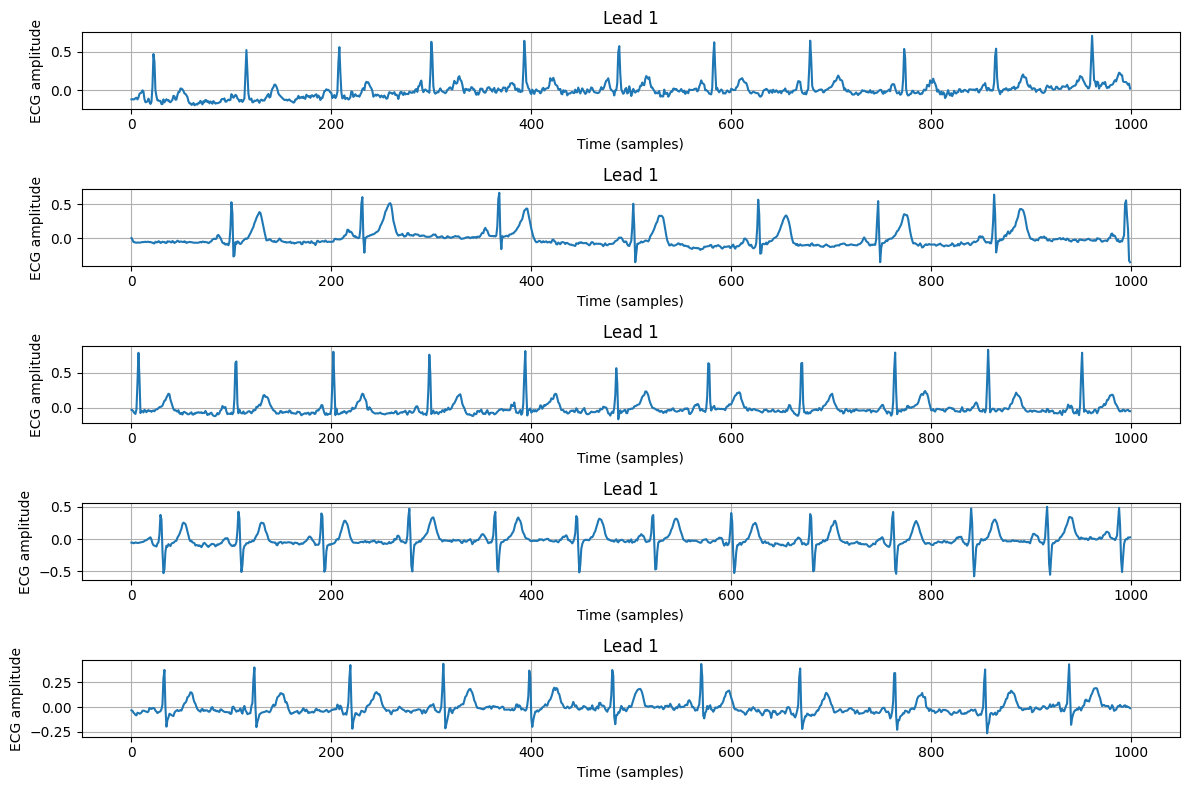

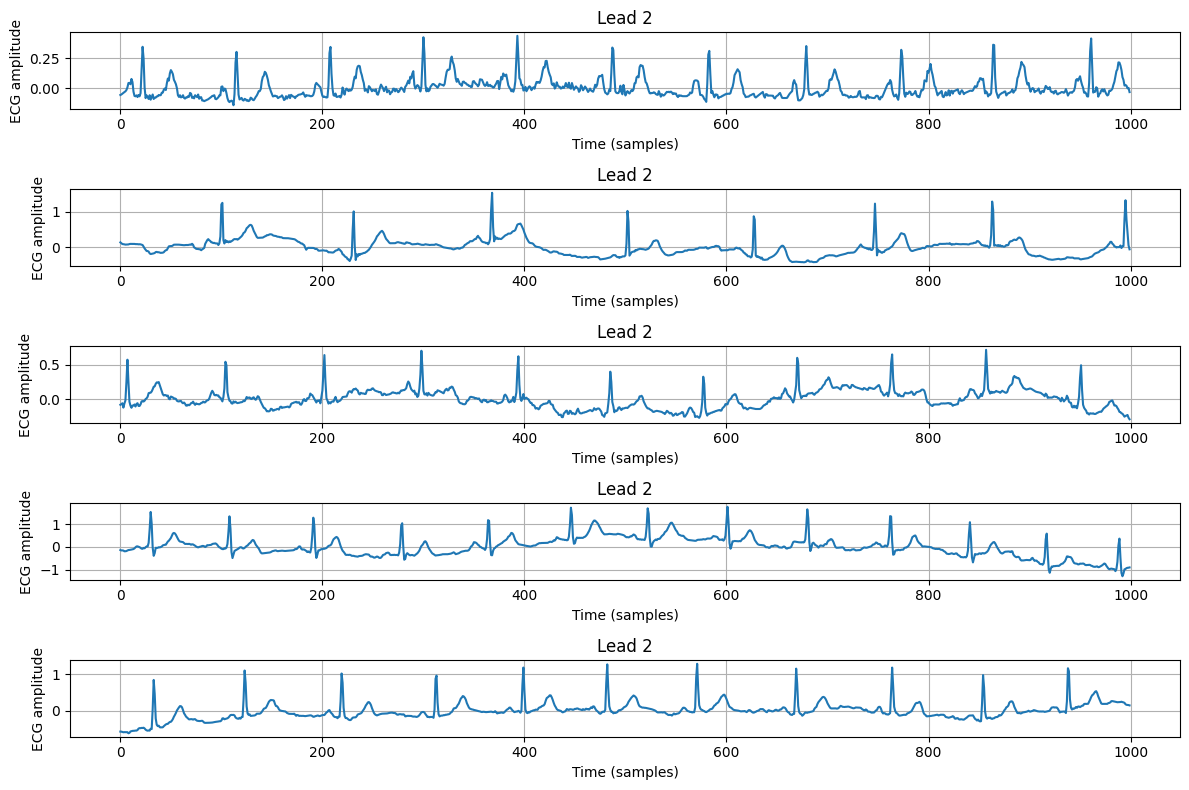

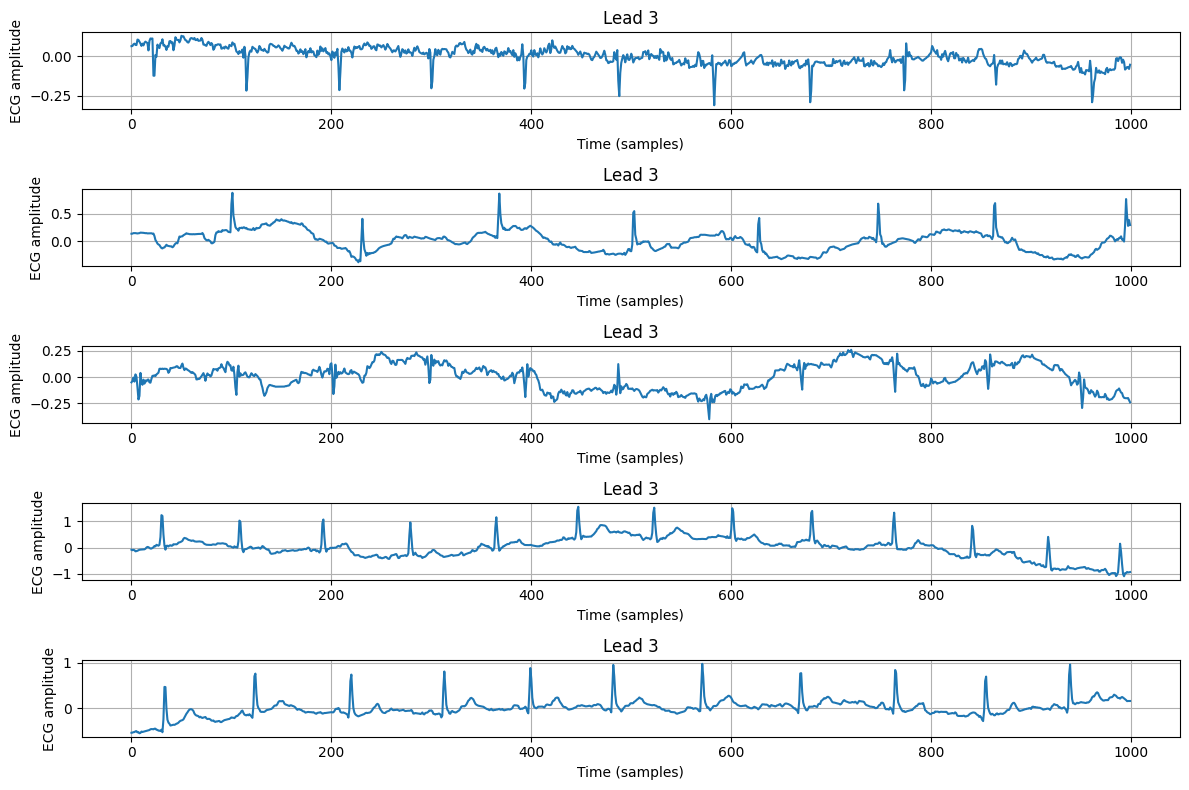

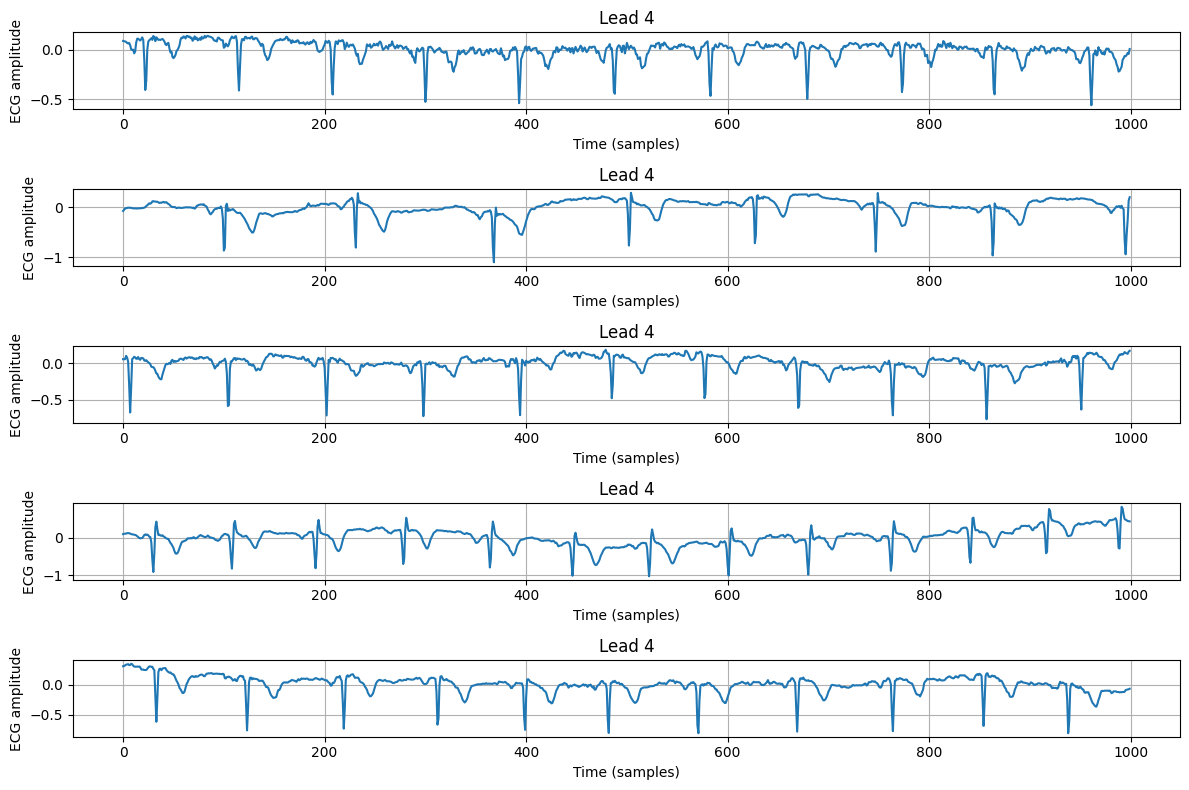

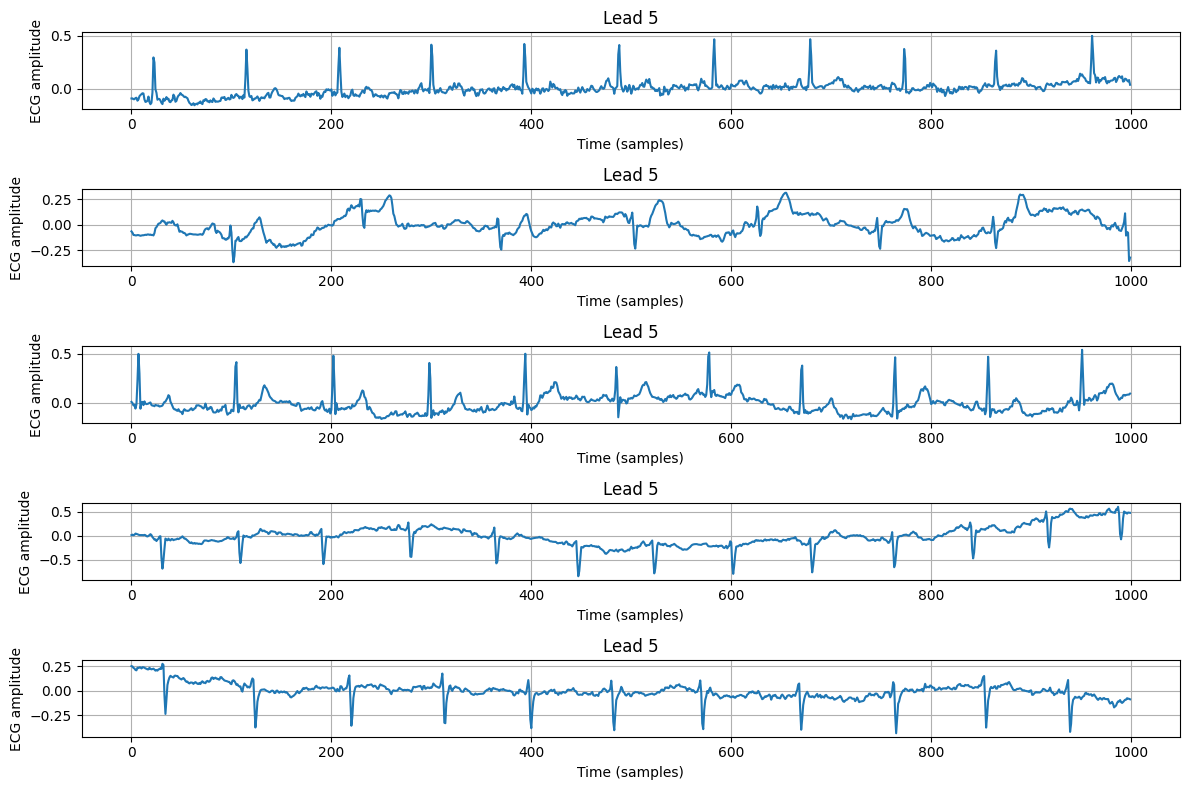

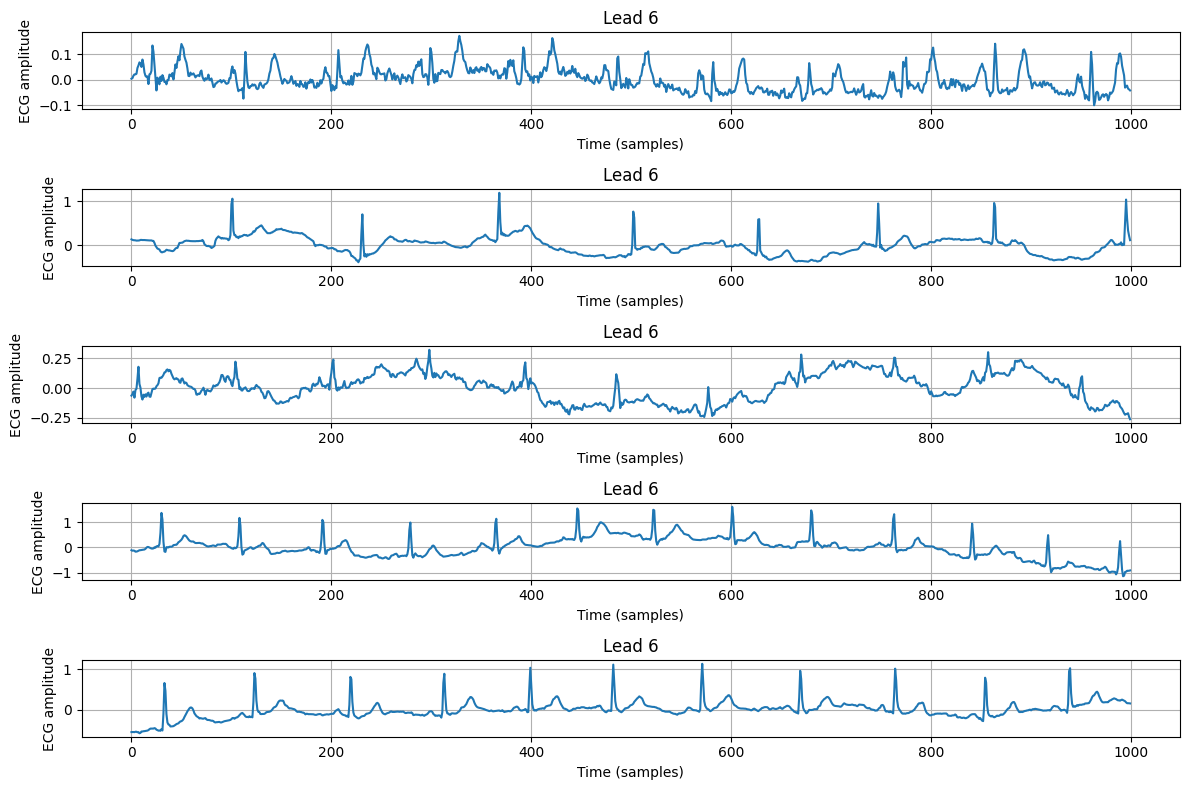

In [32]:
import matplotlib.pyplot as plt

# Select a few random samples and plot them
num_samples_to_plot = 5  
num_leads_to_plot = 6

# Loop over the selected leads
for j in range(num_leads_to_plot):
    # Create a new figure for each lead
    plt.figure(figsize=(12, 8))
    
    # Loop over the samples and plot the selected lead
    for i in range(num_samples_to_plot):
        plt.subplot(num_samples_to_plot, 1, i + 1)
        plt.plot(X_train[i, :, j], label=f"Sample {i+1}")
        plt.title(f"Lead {j+1}")
        plt.xlabel('Time (samples)')
        plt.ylabel('ECG amplitude')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

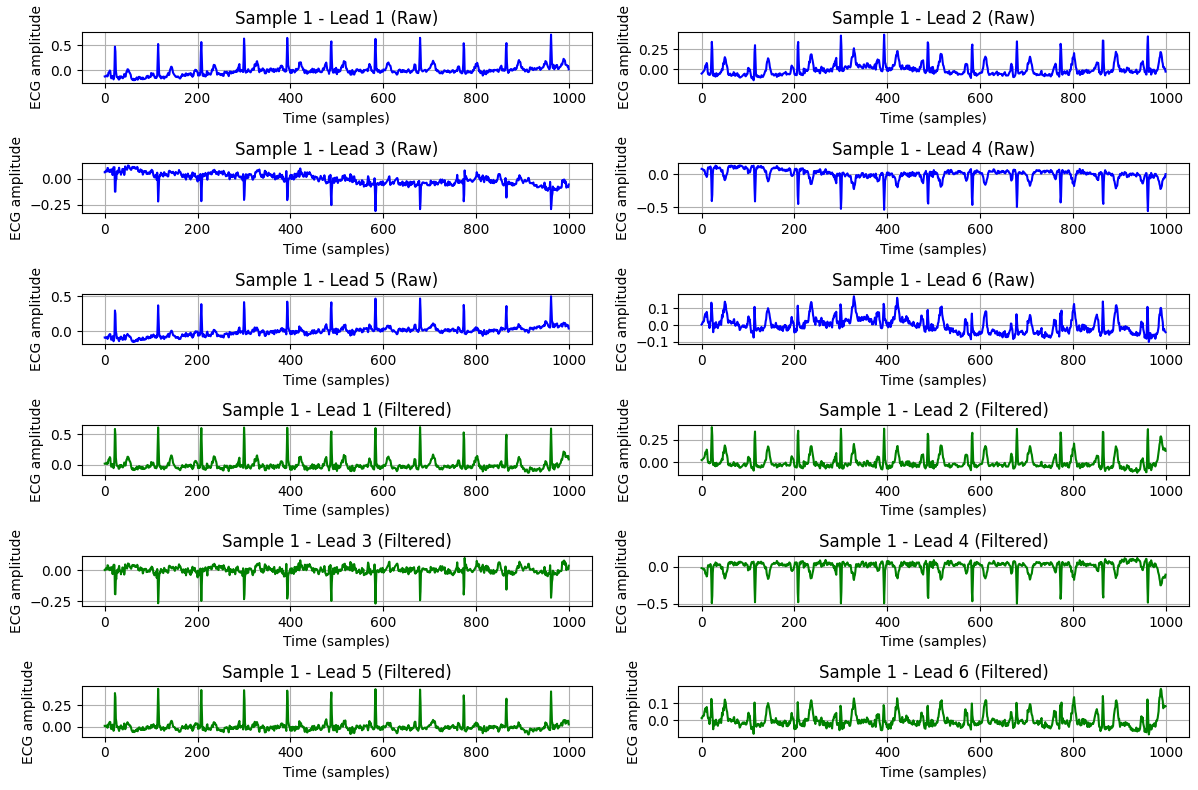

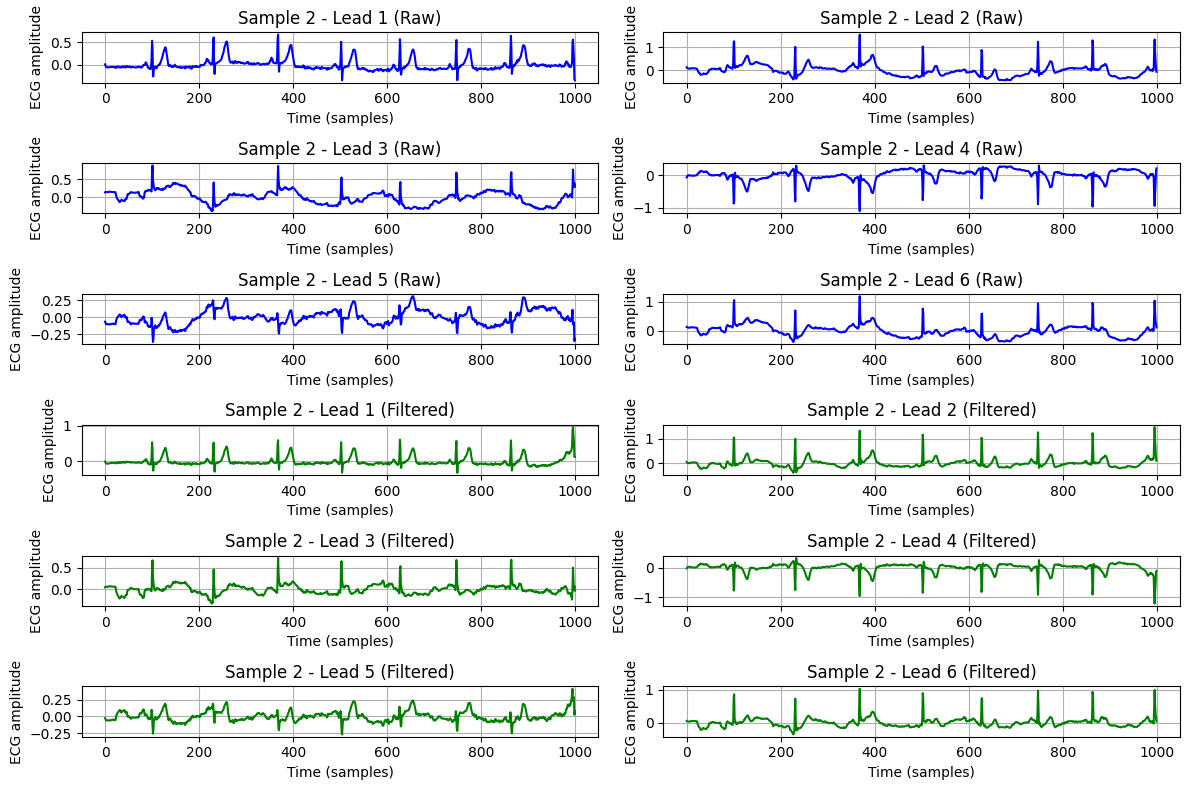

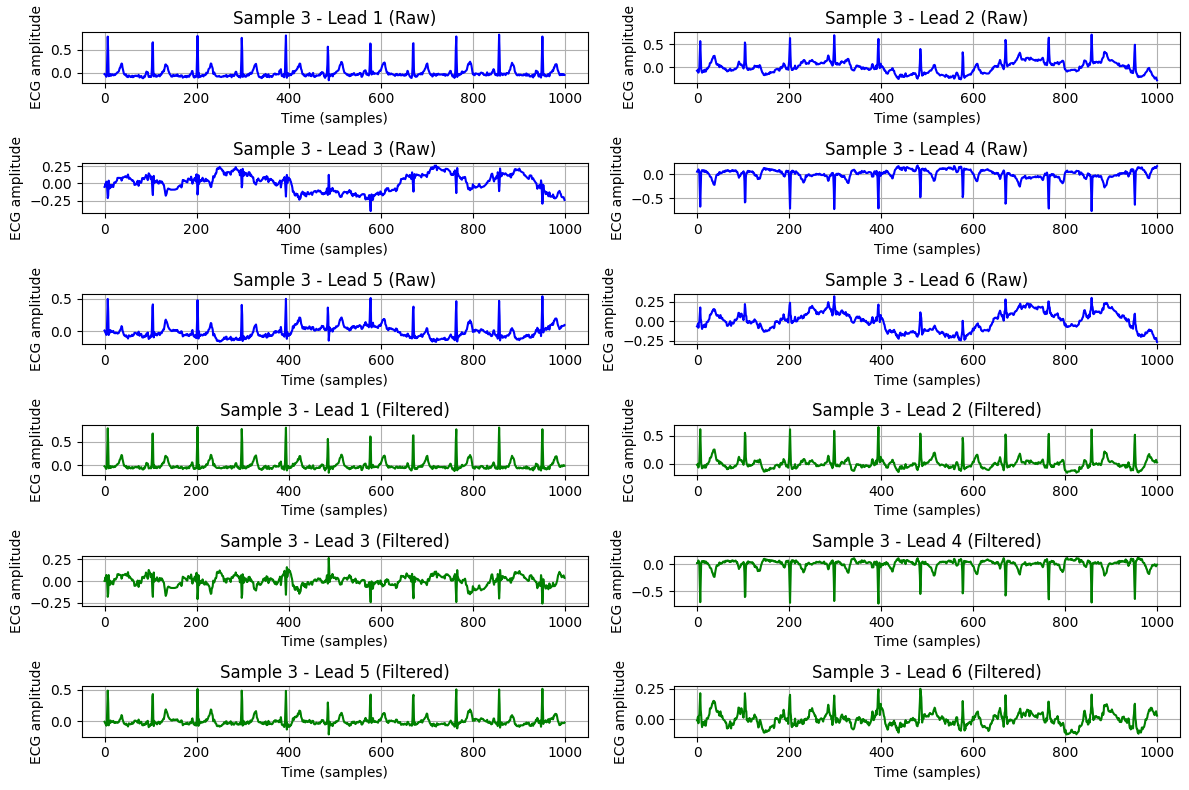

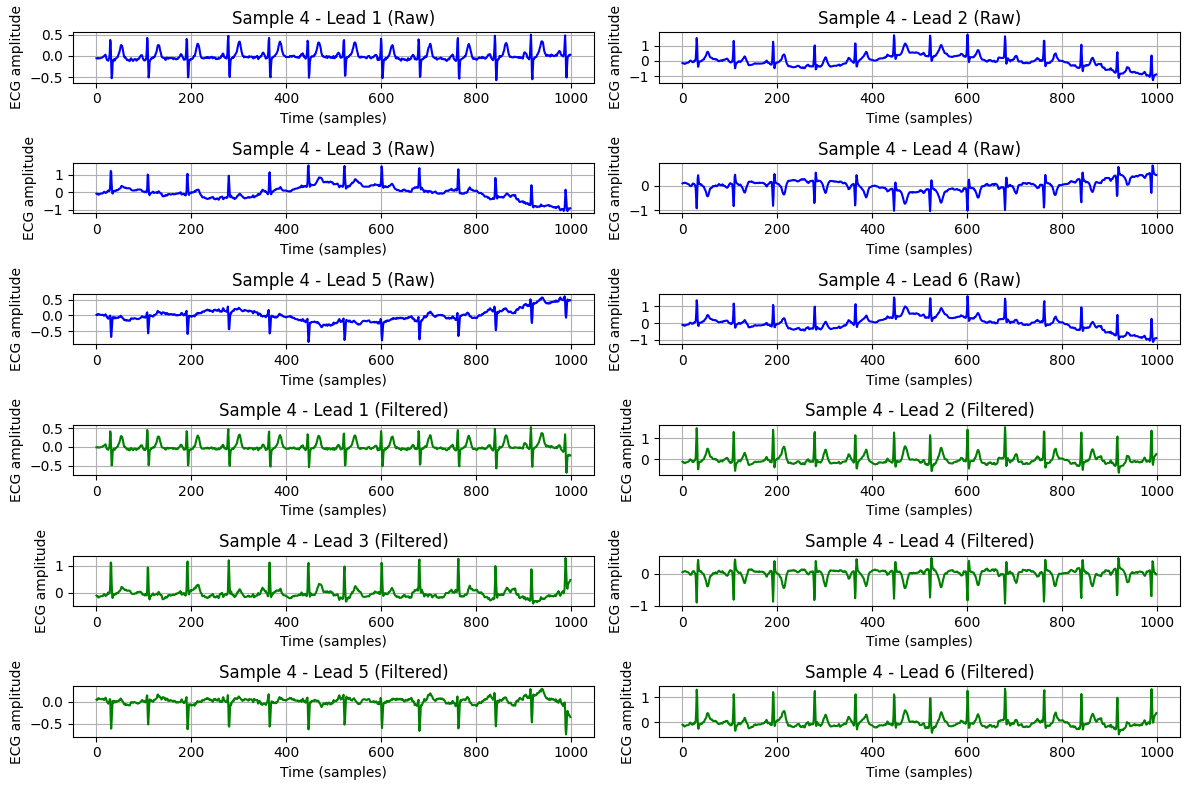

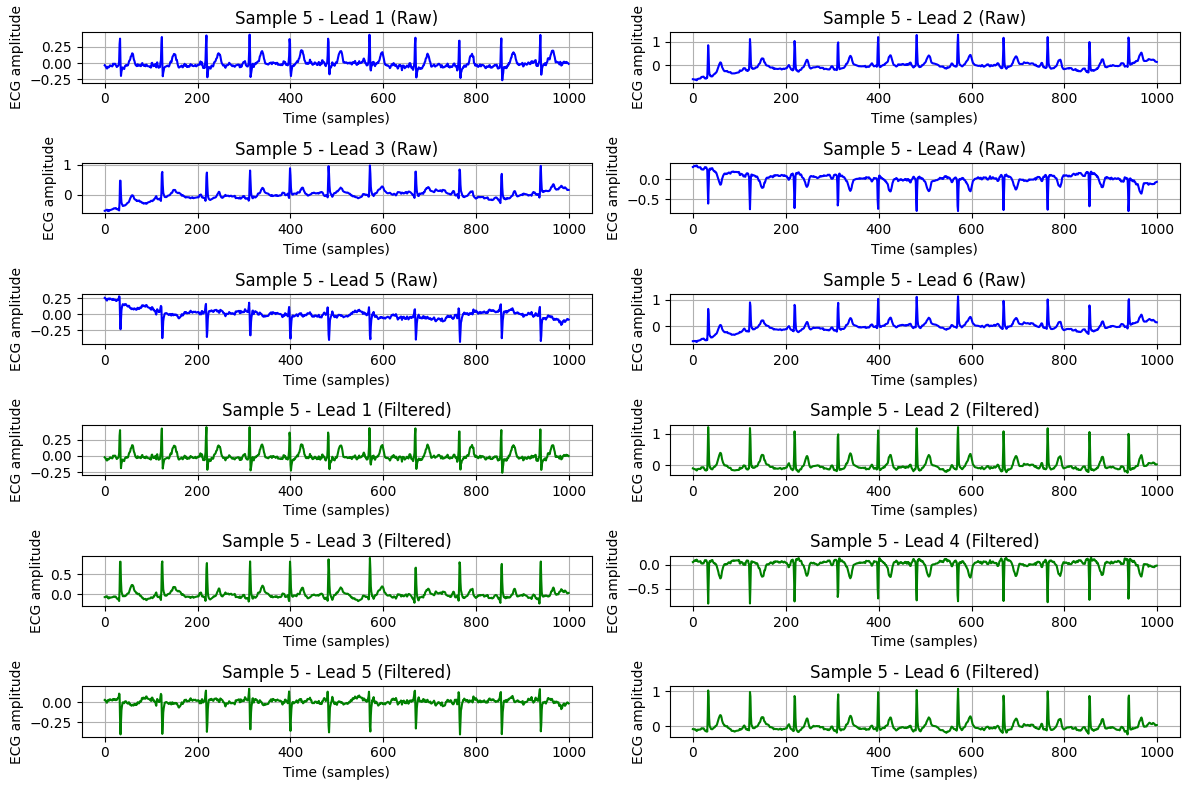

In [33]:
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
fs = 100  # Sampling frequency, adjust based on your dataset

# Select a few random samples to visualize (e.g., 5 samples)
num_samples_to_plot = 5
num_leads_to_plot = 6  # Assuming you have 12 leads, modify as necessary

# Copy the original ECG signals to avoid modifying the original data
ecg_filtered = X_train.copy()  # Replace X_train with your ECG dataset variable if different

# Apply high-pass filter (HPF) at 0.5 Hz
for i in range(num_samples_to_plot):
    for j in range(num_leads_to_plot):
        ecg_filtered[i, :, j] = signal.filtfilt(*signal.butter(2, 0.5, 'high', fs=fs), X_train[i, :, j])

# Apply low-pass filter (LPF) at 45 Hz
for i in range(num_samples_to_plot):
    for j in range(num_leads_to_plot):
        ecg_filtered[i, :, j] = signal.filtfilt(*signal.butter(2, 45, 'low', fs=fs), ecg_filtered[i, :, j])

# Visualizing the original and filtered ECG signals
for i in range(num_samples_to_plot):
    plt.figure(figsize=(12, 8))

    # Loop over the leads and plot them (original signals first)
    for j in range(num_leads_to_plot):
        plt.subplot(num_leads_to_plot, 2, j + 1)
        plt.plot(X_train[i, :, j], label=f"Lead {j+1} (Raw)", color='blue')
        plt.title(f"Sample {i+1} - Lead {j+1} (Raw)")
        plt.xlabel('Time (samples)')
        plt.ylabel('ECG amplitude')
        plt.grid(True)

        # Plot the filtered signals
        plt.subplot(num_leads_to_plot, 2, num_leads_to_plot + j + 1)
        plt.plot(ecg_filtered[i, :, j], label=f"Lead {j+1} (Filtered)", color='green')
        plt.title(f"Sample {i+1} - Lead {j+1} (Filtered)")
        plt.xlabel('Time (samples)')
        plt.ylabel('ECG amplitude')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

In [17]:
# Filtering, for this example we are going to use 2 filters in cascade: HPF at 0.5Hz and LPF at 45Hz
from scipy import signal

fs = 100 #Sampling frequency, check the dataset to see the fs each signal

# filtering
ecg = ecg_signals.copy()
ecg = signal.filtfilt(*signal.butter(2, 5.0, 'high', fs=fs), ecg, axis=-1) # filtfilt applies a filter given the coefficients of the filter
ecg = signal.filtfilt(*signal.butter(2, 45.0, 'low', fs=fs), ecg, axis=-1) # butter designs the filter with a butterworth topology, these filters are order 2 and the cutting frequency is normalized with the sampling frequency
ecg = signal.detrend(ecg)


In [18]:
accum = 0
for lead_index in range(num_leads):
    signal_data = ecg[:,lead_index]

    # Calculate the mean and standard deviation of the signal
    signal_mean = np.mean(signal_data)
    signal_std = np.std(signal_data)

    # Calculate SNR
    SNR = signal_mean / signal_std
    accum += SNR
    print(f"SNR of lead {lead_index + 1}: {SNR}")
print(f"Accumulated SNR: {accum}")

SNR of lead 1: 0.007069333342497298
SNR of lead 2: -0.004169419526828271
SNR of lead 3: -0.012708761579558416
SNR of lead 4: -0.016228769136927595
SNR of lead 5: 0.020457754516467783
SNR of lead 6: -0.008129200970585499
SNR of lead 7: -0.01062777936536339
SNR of lead 8: 0.04596430439591347
SNR of lead 9: -0.018114688230244865
SNR of lead 10: -0.10711675240177751
SNR of lead 11: -0.004078656951113089
SNR of lead 12: 0.014315617028064347
Accumulated SNR: -0.09336701887945574


Another possible solution: SNR consists on comparing what we consider "noise" againts the signal. The first solution uses a simplified version of the SNR calculation assuming positive values. In this context, it does not work as desired since there are negative values in the normal ECG signal. We can use the original definition and compare signal (filtered signal) and noise (difference between the original signal and the filtered one), specifically, the average power of both signals.

In [19]:
# Consider the filtered signal as the clean signal and the difference between the original and the filtered as the noise
signal_clean = ecg.copy()
noise        = ecg_signals - signal_clean
# Calculate the average power per lead of both signal and noise
P_signal = np.average(np.power(signal_clean, 2), axis=0)
P_noise  = np.average(np.power(noise, 2), axis= 0)
# SNR
SNR      = P_signal/P_noise
# SNR can be expressed in decibels
SNR_DB = 10*np.log10(SNR)

for i, lead_SNR in enumerate(SNR):
    print(f"SNR in lead {i+1}: {lead_SNR} or {SNR_DB[i]} dB")

SNR in lead 1: 1.0541433707134704 or 0.22899681915706374 dB
SNR in lead 2: 1.7806479832179356 or 2.5057807215480317 dB
SNR in lead 3: 4.694815388666313 or 6.71618519443483 dB
SNR in lead 4: 6.818982625307445 or 8.33719583868491 dB
SNR in lead 5: 3.3016983507569035 or 5.187373927953467 dB
SNR in lead 6: 0.8989774112942485 or -0.46251220695592776 dB
SNR in lead 7: 1.4790312345850294 or 1.6997734564306353 dB
SNR in lead 8: 3.417226950913155 or 5.336738228889548 dB
SNR in lead 9: 0.5447898472967796 or -2.637709945315236 dB
SNR in lead 10: 0.27980056574168155 or -5.531514117232402 dB
SNR in lead 11: 0.31031248081410456 or -5.082007566759367 dB
SNR in lead 12: 0.4281866041231223 or -3.683669237917251 dB


In [ ]:
# Filtering ECG Data with two filters

fs = 100

# filtering
ecg = ecg_signals.copy()
ecg = signal.filtfilt(*signal.butter(2, 5.0, 'high', fs=fs), ecg, axis=-1)  # Apply high-pass filter (HPF)
ecg = signal.filtfilt(*signal.butter(2, 45.0, 'low', fs=fs), ecg, axis=-1)  # Apply low-pass filter (LPF)
ecg = signal.detrend(ecg)  # Remove baseline drift

Apart from denoising the signal, we can extract features related to the ECG. Let's start with the heart rate. For this, we are going to use a heartbeat detector known as Pan-Tompkins, from a library of ECG detectors: https://pypi.org/project/py-ecg-detectors/ 

The following pipeline was designed for 1 signal, but it can be applied to multiple signals.

In [19]:
from ecgdetectors import Detectors
detectors = Detectors(fs) #Initialize the Detectors class (follow the documentation)
r_peaks = detectors.pan_tompkins_detector(ecg_signals[:,0]) #The algorithm requires the unfiltered signal, also, since the signals are sincronized, only 1 lead is required

ModuleNotFoundError: No module named 'ecgdetectors'

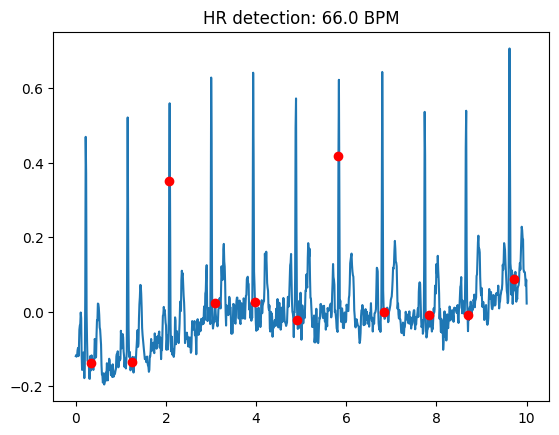

In [17]:
# Results visualization 
import matplotlib.pyplot as plt
signal_to_plot = ecg_signals[:,0]
time_vector    = np.linspace(0,10,1000)

plt.plot(time_vector, signal_to_plot);
plt.plot(time_vector[r_peaks], signal_to_plot[r_peaks], 'ro');
plt.title(f"HR detection: {60*len(r_peaks)/10} BPM"); #Shifting does not matter, we only care about individual carciac cycles detection

Most of the ECG analysis is done through ECG morphology identification, you can, for instance, divide the signal in N parts, depending on the r_peaks detection and analyze the morphology per signal. You can also select the "most representative" cycle.

The most representative cycle is the cycle 10


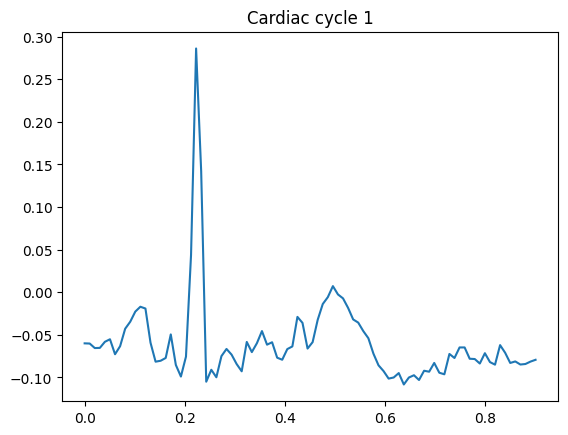

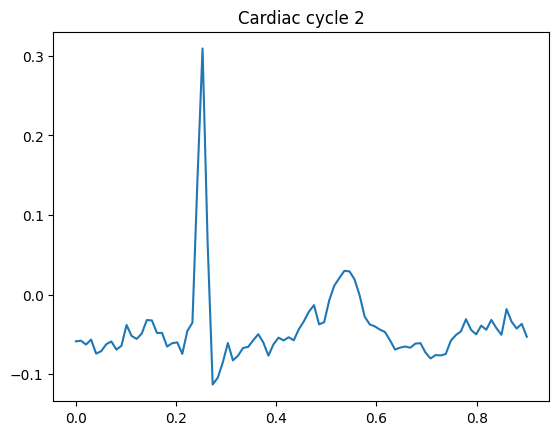

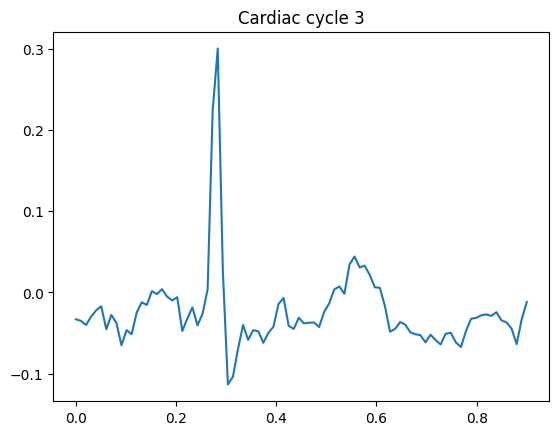

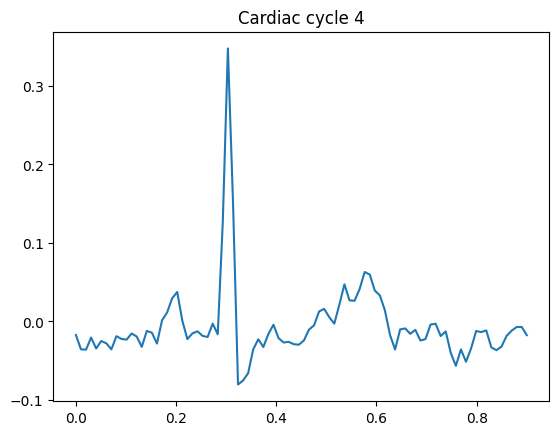

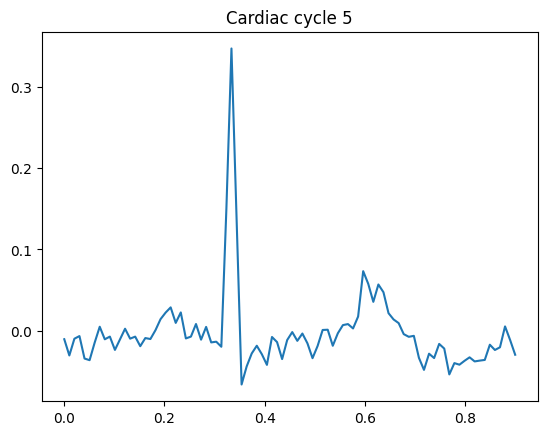

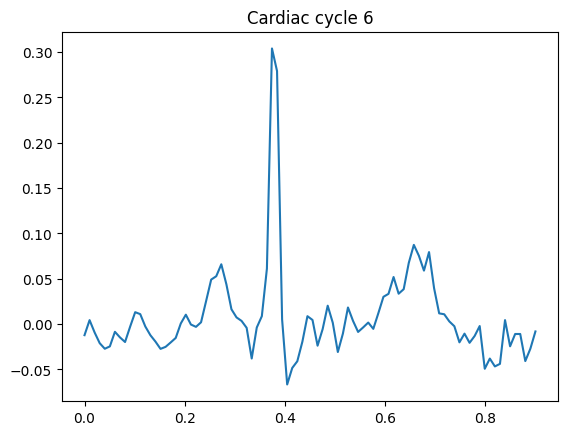

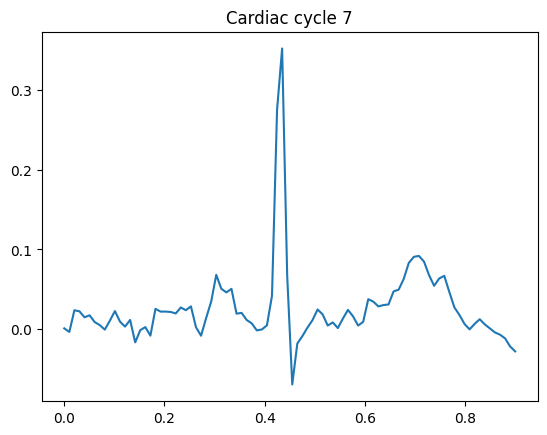

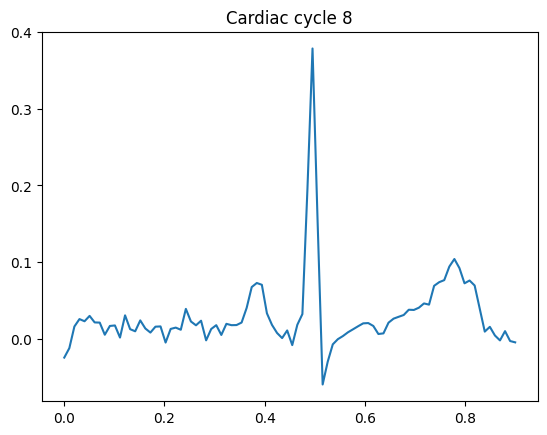

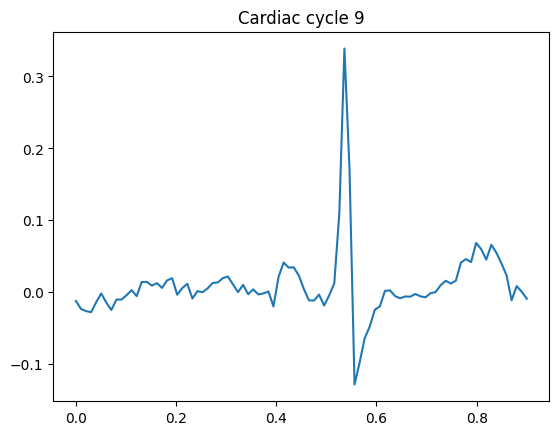

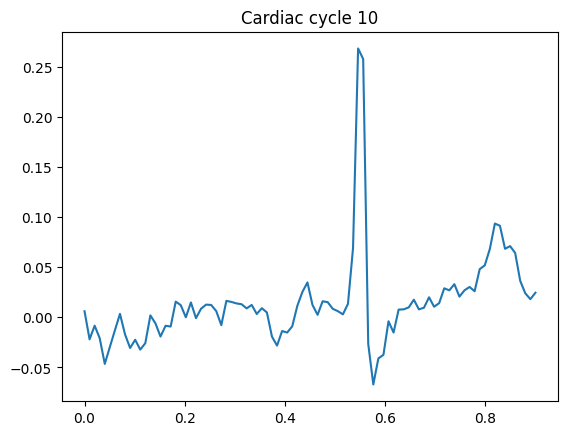

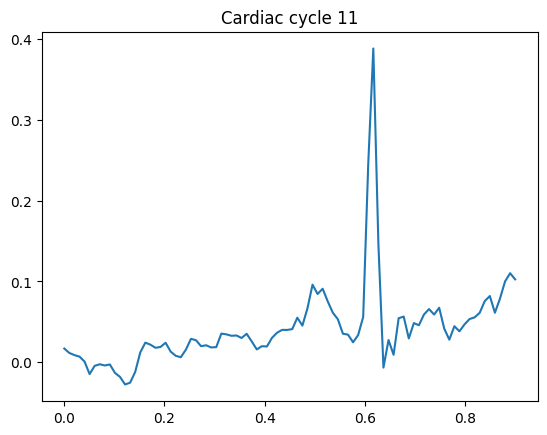

In [18]:
n_cycles = len(r_peaks)
samples_per_cycle = int(np.floor(len(ecg_signals[:,0])/n_cycles)) #This is an approximation
y = []
x_time = np.linspace(0, samples_per_cycle/fs, samples_per_cycle)
for cycle in range(n_cycles):
    plt.figure()
    y_plot = ecg[cycle*samples_per_cycle:(cycle+1)*samples_per_cycle,:]
    plt.plot(x_time, y_plot[:,0])
    plt.title(f"Cardiac cycle {cycle+1}")
    y.append(y_plot)

#The most representative would be the one with the highest cross correlation value
corr_per_channel = np.zeros((n_cycles,12)) 
for lead in range(12):
    corr_per_record = np.zeros((n_cycles, n_cycles))    
    for i in range(n_cycles):
        for j in range(i+1, n_cycles):
            corr = np.corrcoef(y[i][:,lead],y[j][:,lead])[0,1]
            corr_per_record[i,j] = np.abs(corr)
            corr_per_record[j,i] = np.abs(corr)
    corr_per_channel[:,lead] = np.mean(corr_per_record, axis = 1)
scoreCorr = np.sum(corr_per_channel, axis=1) #Max score means max average correlation with the other cycles

max_rep_cycle = np.argmax(scoreCorr)
print(f"The most representative cycle is the cycle {max_rep_cycle+1}")



Once recognized, you can use that particular cycle to train your model, along with other ECG features that you consider relevant and patient data.

However, this automatic cycle selection may not work well for every record, try different algorithms.